## Data Importing

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data
transaction_data = pd.read_csv('QVI_transaction_data.csv')
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [2]:
# Import Data
purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


## High-Level Summary

In [3]:
# Summary Statistics
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [4]:
# Summary Statistics
purchase_behaviour.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


## Data Cleaning and Format Checks

In [5]:
# Check for Missing Values
print(transaction_data.isnull().sum())
print(purchase_behaviour.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [6]:
# Check Data Type
print(transaction_data.dtypes)
print(purchase_behaviour.dtypes)

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object
LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


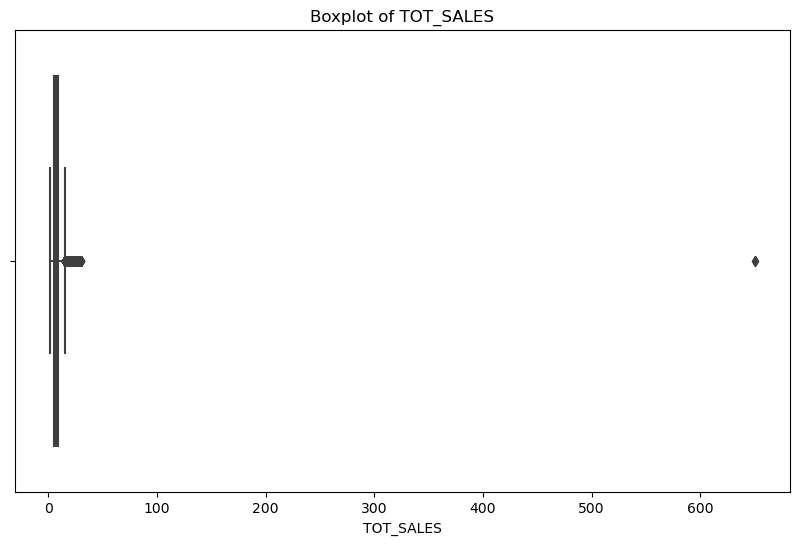

In [47]:
# Check for Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=transaction_data['TOT_SALES'])
plt.title('Boxplot of TOT_SALES')
plt.xlabel('TOT_SALES')
plt.show()

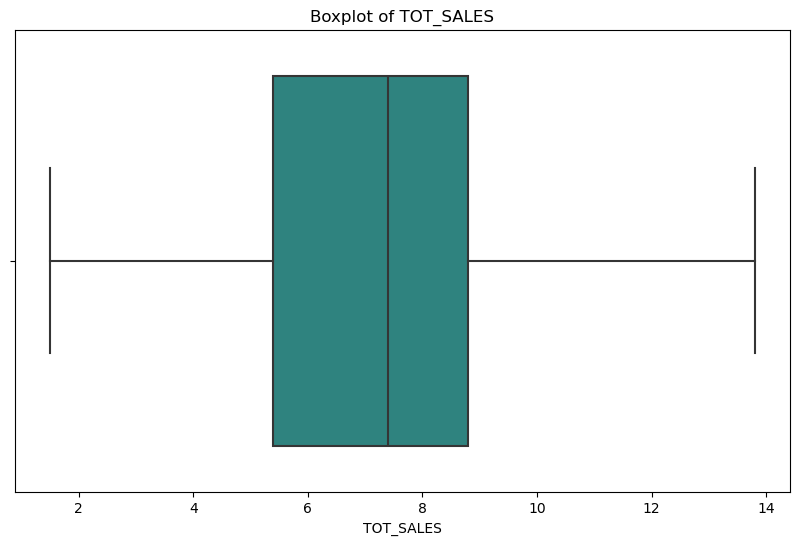

In [75]:
# Remove Outliers
Q1 = filtered_transaction_data['TOT_SALES'].quantile(0.25)
Q3 = filtered_transaction_data['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
filtered_transaction_data = filtered_transaction_data[(filtered_transaction_data['TOT_SALES'] > lower_bound) & (filtered_transaction_data['TOT_SALES'] < upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_transaction_data['TOT_SALES'], palette='viridis')
plt.title('Boxplot of TOT_SALES')
plt.xlabel('TOT_SALES')
plt.show()

## Data Analysis and Data Visualization

In [61]:
# Extract pack size
filtered_transaction_data['PACK_SIZE'] = filtered_transaction_data['PROD_NAME'].str.extract('(\d+)').astype(float)

# Extract brand name
filtered_transaction_data['BRAND'] = filtered_transaction_data['PROD_NAME'].str.split().str[0]

filtered_transaction_data[['PACK_SIZE', 'BRAND']].head()

,PACK_SIZE,BRAND
0,175.0,Natural
1,175.0,CCs
2,170.0,Smiths
4,150.0,Kettle
5,300.0,Old


In [67]:
# Merge transaction data with purchase behavior data
merged_data = filtered_transaction_data.merge(purchase_behaviour, on='LYLTY_CARD_NBR', how='left')

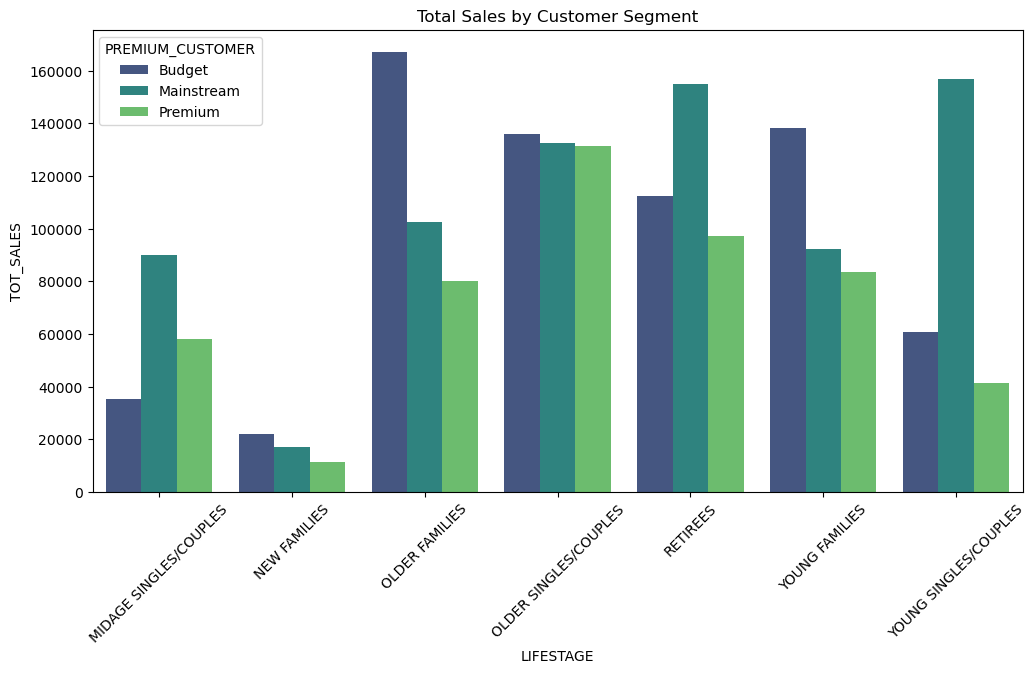

In [77]:
# Summarize Customer Segments
segment_summary = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'TOT_SALES': 'sum',
    'PROD_QTY': 'sum',
    'TXN_ID': 'nunique' 
}).rename(columns={'TXN_ID': 'UNIQUE_TRANSACTIONS'})
segment_summary['AVG_SPEND_PER_TRANSACTION'] = (
    segment_summary['TOT_SALES'] / segment_summary['UNIQUE_TRANSACTIONS']
)
segment_summary = segment_summary.reset_index()

# Plot total sales by customer segment
plt.figure(figsize=(12, 6))
sns.barplot(data=segment_summary, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', palette='viridis')
plt.title("Total Sales by Customer Segment")
plt.xticks(rotation=45)
plt.show()

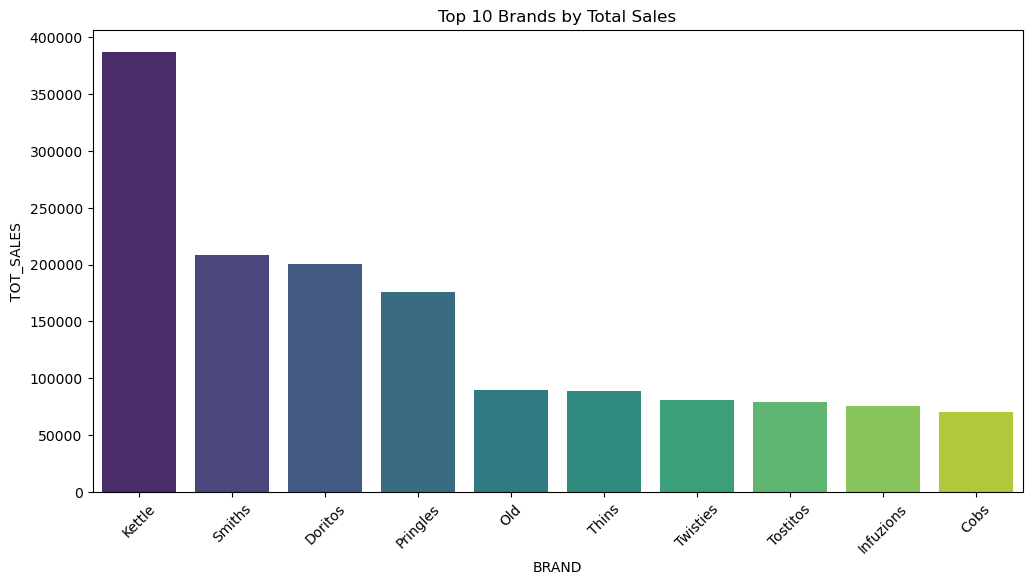

In [71]:
# Identify Top Brands
top_brands = merged_data.groupby('BRAND').agg({'TOT_SALES': 'sum'}).sort_values(
    by='TOT_SALES', ascending=False
).head(10)
top_brands = top_brands.reset_index()

# Plot top brands
plt.figure(figsize=(12, 6))
sns.barplot(data=top_brands, x='BRAND', y='TOT_SALES', palette='viridis')
plt.title("Top 10 Brands by Total Sales")
plt.xticks(rotation=45)
plt.show()

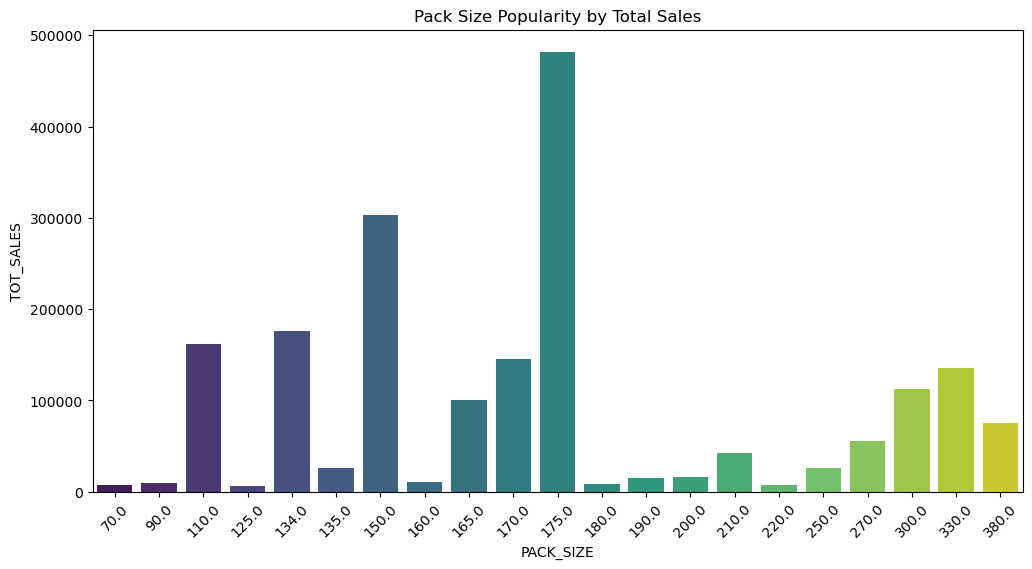

In [73]:
# Analyze Pack Size Popularity
pack_size_summary = merged_data.groupby('PACK_SIZE').agg({'TOT_SALES': 'sum'}).sort_index()
pack_size_summary = pack_size_summary.reset_index()

# Plot pack size popularity
plt.figure(figsize=(12, 6))
sns.barplot(data=pack_size_summary, x='PACK_SIZE', y='TOT_SALES', palette='viridis')
plt.title("Pack Size Popularity by Total Sales")
plt.xticks(rotation=45)
plt.show()